<a href="https://colab.research.google.com/github/jchen8000/MLDLwithPython/blob/main/4_09_Artificial_Neural_Network/Artificial_Neural_Network_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network Introduction

## Install tensorflow

In [ ]:
%pip install \
  numpy==2.0.2 \
  scikit-learn==1.6.1 \
  matplotlib==3.10.0 \
  tensorflow==2.19.0

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import model_selection 
from sklearn import metrics

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


## ANN on IRIS Dataset

In [ ]:
# Data
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, train_size=0.75, random_state=0, stratify=y  # stratify is good practice
)

# Build the ANN model (use Input() instead of input_shape= on Dense)
model = keras.Sequential(name="ANN_Iris_Dataset")
model.add(keras.Input(shape=(4,)))
model.add(layers.Dense(8, activation='sigmoid', name='Hidden'))
model.add(layers.Dense(3, activation='softmax', name='Output'))

# Compile: metrics must be list/tuple/dict
opt_ = keras.optimizers.Adam(learning_rate=0.01)
loss_ = keras.losses.CategoricalCrossentropy()
metrics_ = keras.metrics.CategoricalAccuracy()

model.compile(optimizer=opt_, loss=loss_, metrics=[metrics_])

print(model.summary())

# Train (one-hot encode labels for CategoricalCrossentropy)
history = model.fit(
    X_train,
    to_categorical(y_train),
    epochs=300,
    verbose=0,
    validation_split=0.2  # optional but recommended
)

# Evaluate
results = model.evaluate(X_test, to_categorical(y_test), verbose=0)
print('Final loss: {:.4f}'.format(results[0]))
print('Final accuracy: {:.4f}'.format(results[1]))

Model: "ANN_Iris_Dataset"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden (Dense)              (None, 8)                 40        
                                                                 
 Output (Dense)              (None, 3)                 27        
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________
None
2/2 [==============================] - 0s 12ms/step - loss: 0.1001 - categorical_accuracy: 0.9737
Final loss: 0.100072
Final accuracy: 0.973684


dict_keys(['loss', 'categorical_accuracy'])


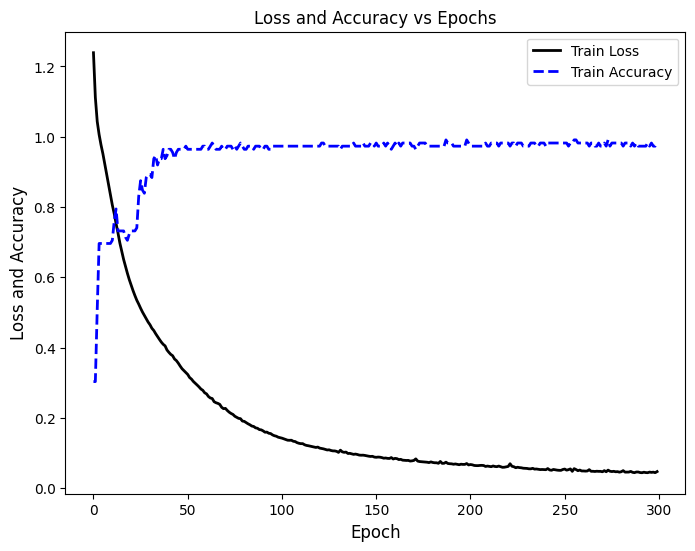

In [5]:
print(history.history.keys())
fig = plt.figure(figsize=(8,6))
plt.title('Loss and Accuracy vs Epochs')
plt.plot(history.history['loss'], label="Train Loss", c='k', lw=2)
plt.plot(history.history['categorical_accuracy'], label="Train Accuracy", c='blue', ls='--', lw=2)
plt.xlabel(r'Epoch', fontsize=12)
plt.ylabel(r'Loss and Accuracy', fontsize=12)
plt.legend(loc='best')
plt.savefig("ANN_on_IRIS.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

In [6]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

a_score = metrics.accuracy_score(y_test, y_pred)
c_matrix = metrics.confusion_matrix(y_test, y_pred)
c_report = metrics.classification_report(y_test, y_pred)
print("Accuracy Score:\n", a_score)
print("Confusion matrix:\n", c_matrix)
print("Classification Report:\n", c_report)

2/2 [==============================] - 0s 7ms/step
Accuracy Score:
 0.9736842105263158
Confusion matrix:
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



## Classification Problem: ANN on MNIST Dataset

### Load MNIST dataset

X_train: (60000, 28, 28)
y_train: (60000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)


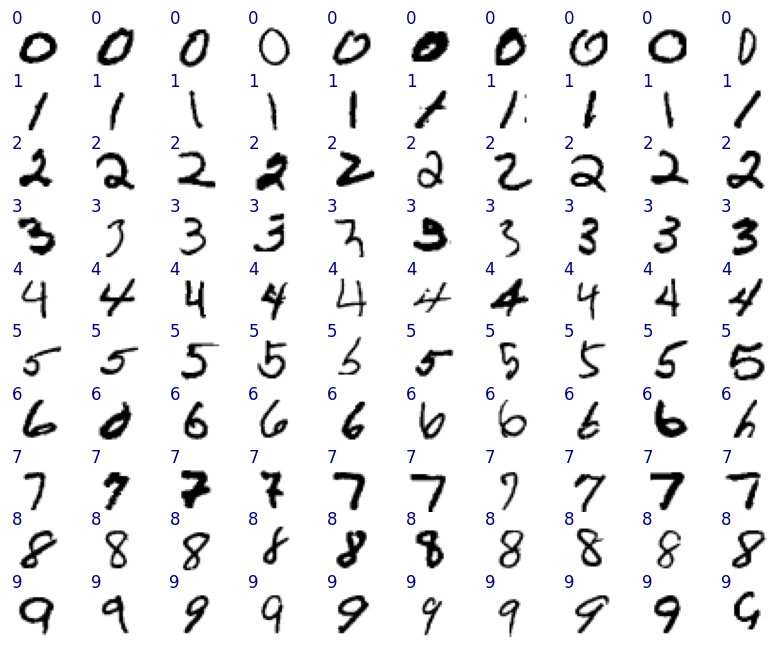

In [ ]:
# https://victorzhou.com/blog/keras-neural-network-tutorial/
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

np.random.seed(0)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train: ' + str(X_train.shape))
print('y_train: ' + str(y_train.shape))
print('X_test:  ' + str(X_test.shape))
print('y_test:  ' + str(y_test.shape))

row, col = 10, 10
_, axarr = plt.subplots(row, col, figsize=(10, 8))
np.random.seed(6)
for i in range(row):
    filter = np.where((y_train == i))
    X1, Y1 = X_train[filter], y_train[filter]
    # X1, Y1 = X_train, y_train
    for j in range(col):
        index = np.random.randint(X1.shape[0])
        axarr[i, j].imshow(X1[index], cmap="binary")
        axarr[i, j].axis('off')
        axarr[i, j].text(0.5, 1, str(Y1[index]), fontsize=12, c='darkblue')
plt.savefig("mnist.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

### Pre-processing

In [8]:
from sklearn import preprocessing
# # Flatten the images.
X_train = X_train.reshape((-1, 784))
X_test = X_test.reshape((-1, 784))

# # Normalize the images.
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test) 
# X_train, X_test = X_train/255.0, X_test/255.0

### Build the ANN model and Train it

In [ ]:
model = keras.Sequential([
    keras.Input(shape=(784,)), 
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(10, activation='softmax'),
])

# Compile: metrics should be a list/tuple/dict
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy'],
)

# Train with one-hot labels (since loss is categorical_crossentropy)
history = model.fit(
    X_train,
    to_categorical(y_train),
    verbose=2,
    epochs=50
)

# Evaluate
results = model.evaluate(X_test, to_categorical(y_test), verbose=0)
print(f'Evaluation Loss: {results[0]:.4f}')
print(f'Evaluation Accuracy: {results[1]:.4f}')


Epoch 1/50
1875/1875 - 5s - loss: 0.3600 - categorical_accuracy: 0.9049 - 5s/epoch - 3ms/step
Epoch 2/50
1875/1875 - 5s - loss: 0.1874 - categorical_accuracy: 0.9467 - 5s/epoch - 2ms/step
Epoch 3/50
1875/1875 - 4s - loss: 0.1444 - categorical_accuracy: 0.9590 - 4s/epoch - 2ms/step
Epoch 4/50
1875/1875 - 4s - loss: 0.1175 - categorical_accuracy: 0.9671 - 4s/epoch - 2ms/step
Epoch 5/50
1875/1875 - 5s - loss: 0.0986 - categorical_accuracy: 0.9719 - 5s/epoch - 2ms/step
Epoch 6/50
1875/1875 - 4s - loss: 0.0845 - categorical_accuracy: 0.9768 - 4s/epoch - 2ms/step
Epoch 7/50
1875/1875 - 4s - loss: 0.0722 - categorical_accuracy: 0.9804 - 4s/epoch - 2ms/step
Epoch 8/50
1875/1875 - 5s - loss: 0.0628 - categorical_accuracy: 0.9832 - 5s/epoch - 2ms/step
Epoch 9/50
1875/1875 - 4s - loss: 0.0547 - categorical_accuracy: 0.9859 - 4s/epoch - 2ms/step
Epoch 10/50
1875/1875 - 4s - loss: 0.0470 - categorical_accuracy: 0.9885 - 4s/epoch - 2ms/step
Epoch 11/50
1875/1875 - 5s - loss: 0.0412 - categorical_acc

### Make prediction and evaluation

In [10]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

a_score = metrics.accuracy_score(y_test, y_pred)
c_matrix = metrics.confusion_matrix(y_test, y_pred)
c_report = metrics.classification_report(y_test, y_pred)
print("Accuracy Score:\n", a_score)
print("Confusion matrix:\n", c_matrix)
print("Classification Report:\n", c_report)

313/313 [==============================] - 1s 2ms/step
Accuracy Score:
 0.9588
Confusion matrix:
 [[ 963    1    2    4    2    5    2    0    0    1]
 [   0 1122    5    1    0    1    2    2    2    0]
 [   6    3  979    8    7    4    6    6   12    1]
 [   1    1    8  960    1   13    1   12    8    5]
 [   1    2    2    1  953    0    7    3    2   11]
 [   2    1    0   13    4  849    7    0   12    4]
 [   8    3    3    0    7   12  922    0    2    1]
 [   0    6   12    7    9    1    0  973    3   17]
 [   6    2    7   11    8   12    5    5  913    5]
 [   2    5    2    9   18    4    0    7    8  954]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.95      0.95      1032
           3       0.95      0.95      0.95      1010
           4       0.94      0.97      0.96       982
           5       0.9

dict_keys(['loss', 'categorical_accuracy'])


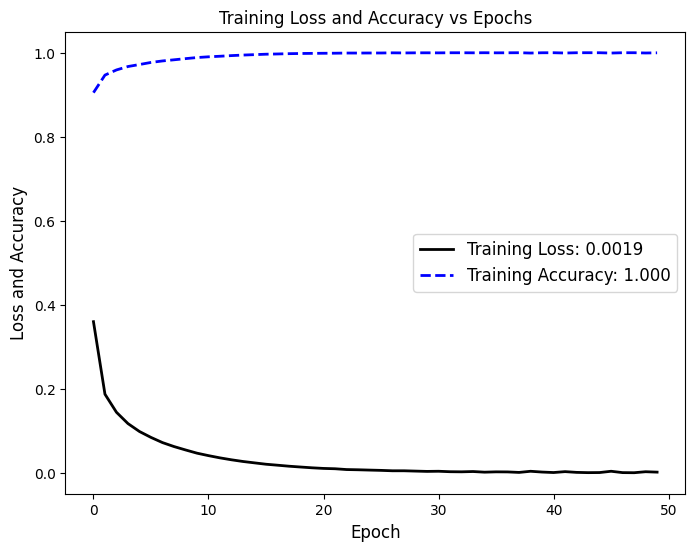

In [11]:
print(history.history.keys())
fig = plt.figure(figsize=(8,6))
plt.title('Training Loss and Accuracy vs Epochs')
plt.plot(history.history['loss'], label="Training Loss: %.4f"%history.history['loss'][-1], c='k', lw=2)
plt.plot(history.history['categorical_accuracy'], label="Training Accuracy: %.3f"%history.history['categorical_accuracy'][-1], c='blue', ls='--', lw=2)
plt.xlabel(r'Epoch', fontsize=12)
plt.ylabel(r'Loss and Accuracy', fontsize=12)
plt.legend(loc='best', fontsize=12)
plt.savefig("ANN_on_MNIST.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

### Save and Load the model

Save the model in HDF5 format:

In [12]:
# Save the model
model.save('ann_on_mnist.h5')

Load the saved model:

In [13]:
# Load the model
from tensorflow.keras.models import load_model
savedModel=load_model('ann_on_mnist.h5')
savedModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


Make evaluation and prediction with the saved model, no need to fit it:

In [14]:
# Evaluate the model.
results = savedModel.evaluate( X_test,
                               to_categorical(y_test)  )
print('Final loss: {:4f}'.format(results[0]))
print('Final accuracy: {:4f}'.format(results[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.2380 - categorical_accuracy: 0.9588
Final loss: 0.237959
Final accuracy: 0.958800


In [15]:
y_pred = savedModel.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

a_score = metrics.accuracy_score(y_test, y_pred)
c_matrix = metrics.confusion_matrix(y_test, y_pred)
c_report = metrics.classification_report(y_test, y_pred)
print("Accuracy Score:\n", a_score)
print("Confusion matrix:\n", c_matrix)
print("Classification Report:\n", c_report)

313/313 [==============================] - 1s 2ms/step
Accuracy Score:
 0.9588
Confusion matrix:
 [[ 963    1    2    4    2    5    2    0    0    1]
 [   0 1122    5    1    0    1    2    2    2    0]
 [   6    3  979    8    7    4    6    6   12    1]
 [   1    1    8  960    1   13    1   12    8    5]
 [   1    2    2    1  953    0    7    3    2   11]
 [   2    1    0   13    4  849    7    0   12    4]
 [   8    3    3    0    7   12  922    0    2    1]
 [   0    6   12    7    9    1    0  973    3   17]
 [   6    2    7   11    8   12    5    5  913    5]
 [   2    5    2    9   18    4    0    7    8  954]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.95      0.95      1032
           3       0.95      0.95      0.95      1010
           4       0.94      0.97      0.96       982
           5       0.9

## Regression Problem: ANN on Diabetes Dataset

### Load Diabetes Dataset

In [16]:
X, y = datasets.load_diabetes(return_X_y = True)
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(X, y, 
                                 test_size=0.2, 
                                 random_state=1)
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (353, 10)
y_train: (353,)
X_test: (89, 10)
y_test: (89,)


### Pre-processing

In [17]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Build ANN Model and Train it

In [ ]:
# Build the model.
model = keras.Sequential([
    keras.Input(shape=(10,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='linear') 
], name="ANN_Regression")

# Compile the model.
opt_ = keras.optimizers.Adam(learning_rate=0.005)
loss_ = keras.losses.MeanSquaredError()
metrics_ = keras.metrics.RootMeanSquaredError()

model.compile(
    optimizer=opt_,
    loss=loss_,
    metrics=[metrics_]
)

# Train the model.
history = model.fit(
    X_train,
    y_train,
    verbose=0,
    validation_split=0.2,
    epochs=100
)

### Evaluate the model

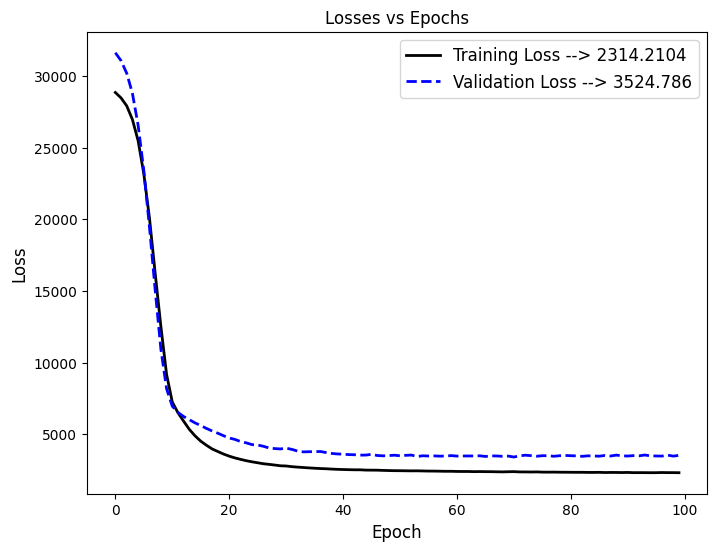

In [19]:
# print(history.history.keys())
fig = plt.figure(figsize=(8,6))
plt.title('Losses vs Epochs')
plt.plot(history.history['loss'], label="Training Loss --> %.4f"%history.history['loss'][-1], c='k', lw=2)
plt.plot(history.history['val_loss'], label="Validation Loss --> %.3f"%history.history['val_loss'][-1], c='blue', ls='--', lw=2)
plt.xlabel(r'Epoch', fontsize=12)
plt.ylabel(r'Loss', fontsize=12)
plt.legend(loc='best', fontsize=12)
plt.savefig("ANN_on_Diabetes2.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

In [20]:
results = model.evaluate( X_test,
                          y_test  )
print('Final loss: {:4f}'.format(results[0]))
print('Final metrics: {:4f}'.format(results[1]))

3/3 [==============================] - 0s 4ms/step - loss: 2973.6602 - root_mean_squared_error: 54.5313
Final loss: 2973.660156
Final metrics: 54.531277


### Fine-tune the Model

Not scale the dataset

In [21]:
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(X, y, 
                                 test_size=0.2, 
                                 random_state=1)

Re-build the model and train it

In [ ]:
model = keras.Sequential([
    keras.Input(shape=(10,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='linear') 
])

# Compile the model.
opt_ = keras.optimizers.Adam(learning_rate=0.005)
loss_ = keras.losses.MeanSquaredError()
metrics_ = keras.metrics.RootMeanSquaredError()
model.compile(optimizer=opt_, 
              loss=loss_, 
              metrics=[metrics_])
              
# Train the model.
history = model.fit(
  X_train,
  y_train,
  verbose=0,
  validation_split=0.2,
  epochs=100 )


Re-evaluate the model

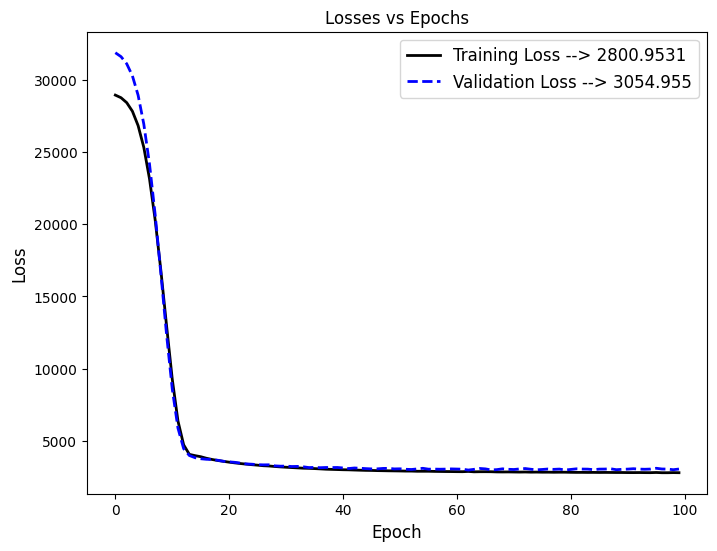

In [23]:
# print(history.history.keys())
fig = plt.figure(figsize=(8,6))
plt.title('Losses vs Epochs')
plt.plot(history.history['loss'], label="Training Loss --> %.4f"%history.history['loss'][-1], c='k', lw=2)
plt.plot(history.history['val_loss'], label="Validation Loss --> %.3f"%history.history['val_loss'][-1], c='blue', ls='--', lw=2)
plt.xlabel(r'Epoch', fontsize=12)
plt.ylabel(r'Loss', fontsize=12)
plt.legend(loc='best', fontsize=12)
plt.savefig("ANN_on_Diabetes.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

In [24]:
results = model.evaluate( X_test,
                          y_test  )
print('Final loss: {:4f}'.format(results[0]))
print('Final metrics: {:4f}'.format(results[1]))

3/3 [==============================] - 0s 7ms/step - loss: 3076.4438 - root_mean_squared_error: 55.4657
Final loss: 3076.443848
Final metrics: 55.465698
